In [1]:
import json
from pathlib import Path
import shutil
from copy import deepcopy

# import os
# from pathlib import Path
# project_main_path = Path.cwd().parent
# assert project_main_path.name == 'EC523_Project_G'
# added_path = os.path.abspath(project_main_path.__str__())
# if added_path not in os.sys.path:
#     os.sys.path.append(added_path)  

PHASE3_SCENE_DESCRIPTION_FILE = "../DATASET/PROCESSING_RECORD_PHASE3_SCENE_DESCRIPTION.json"


with open(PHASE3_SCENE_DESCRIPTION_FILE, "r") as f:
    phase3_record = json.load(f)


dict_keys(['image_path_scene', 'image_path_segmt', 'image_path_cropped_figures_with_bbox_segmt', 'image_path_instance_removed', 'image_path_inpainting', 'subtitles_5_before', 'subtitles_5_after', 'image_scene_llava_description', 'video_time_in_seconds'])
[{'bbox': [0, 1, 102, 255], 'instance_id': 0, 'color': [16, 16, 255], 'img_path': 'DATASET/CROPPED_FIGURES/cute/cute01/scene_00190/figure_00000.png', 'mask_path': 'DATASET/CROPPED_FIGURES/cute/cute01/scene_00190/figure_mask_00000.png'}, {'bbox': [110, 39, 62, 217], 'instance_id': 1, 'color': [16, 255, 16], 'img_path': 'DATASET/CROPPED_FIGURES/cute/cute01/scene_00190/figure_00001.png', 'mask_path': 'DATASET/CROPPED_FIGURES/cute/cute01/scene_00190/figure_mask_00001.png'}, {'bbox': [168, 5, 88, 250], 'instance_id': 2, 'color': [16, 240, 255], 'img_path': 'DATASET/CROPPED_FIGURES/cute/cute01/scene_00190/figure_00002.png', 'mask_path': 'DATASET/CROPPED_FIGURES/cute/cute01/scene_00190/figure_mask_00002.png'}]
figure_mask_00000.png
figure_000

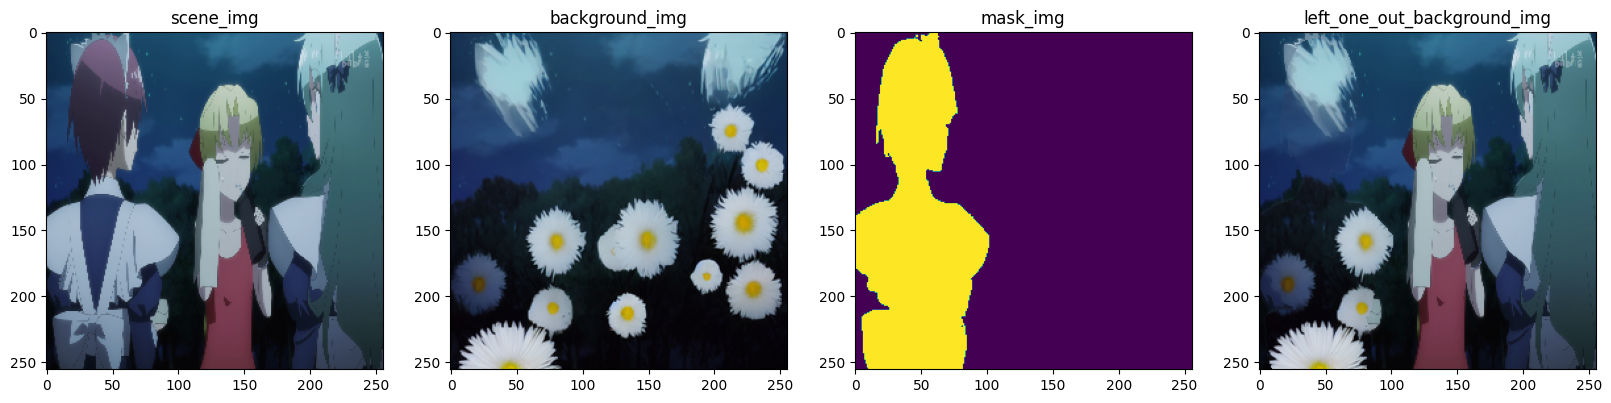

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

i_scene = 190
scene_data = phase3_record["dataset_dict"]["cute"]["cute01"][i_scene]["scene_data"]
print(scene_data.keys())
figure_mask_path_list  = scene_data["image_path_cropped_figures_with_bbox_segmt"]
print(figure_mask_path_list)
mask_img_list = []
i_figure = 0
for i_figure in range(3):
    figure_path  = figure_mask_path_list[i_figure]["img_path"]
    # print(figure_path)
    mask_path = figure_mask_path_list[i_figure]["mask_path"]
    # print(mask_path)
    mask_file_name = mask_path.split("/")[-1]
    print(mask_file_name)
    mask_file_name_list = mask_file_name.split("_")
    # print(mask_file_name_list)
    if mask_file_name_list[1] == "mask":
        mask_file_name2 = f"{mask_file_name_list[0]}_{mask_file_name_list[-1].split('.')[0]}_mask.png"
        print(mask_file_name2)
    mask_path = mask_path.replace(mask_file_name, mask_file_name2)
    figure_img = Image.open(Path("../") / figure_path).convert("RGB")
    figure_img = np.array(figure_img)
    mask_img = Image.open(Path("../") / mask_path)
    mask_img = mask_img.convert("L")
    mask_img = np.array(mask_img)
    # print(mask_img.shape, figure_img.shape)
    mask_img_list.append(mask_img)
    
    # plt.figure(figsize=(10, 10))
    # plt.subplot(1, 2, 1)
    # plt.imshow(figure_img)
    # plt.subplot(1, 2, 2)
    # plt.imshow(mask_img)

image_path_scene = scene_data["image_path_scene"]
scene_img = Image.open(Path("../") / image_path_scene).convert("RGB")
scene_img = np.array(scene_img)

image_path_inpainting = scene_data["image_path_inpainting"][0]["path"]
# print(image_path_inpainting)
background_img = Image.open(Path("../") / image_path_inpainting).convert("RGB")
background_img = np.array(background_img)

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(scene_img)
plt.title("scene_img")
# plt.figure()
plt.subplot(1, 4, 2)
plt.imshow(background_img)
plt.title("background_img")

left_one_out_background_img = deepcopy(scene_img)
# for mask_img in mask_img_list:
#     # print(mask_img.shape, scene_img.shape)
#     # print(mask_img)
#     plt.figure()
#     plt.imshow(mask_img)
#     left_one_out_background_img[mask_img > 100] = background_img[mask_img > 100]
#     plt.figure()
#     img_tmp = deepcopy(left_one_out_background_img)
#     plt.imshow(img_tmp)
#     # break


len_figure = len(mask_img_list)
i_figure = np.random.randint(0, len_figure)
mask_img = mask_img_list[i_figure]

# plt.figure()
plt.subplot(1, 4, 3)
plt.imshow(mask_img)
plt.title("mask_img")
# plt.figure()
plt.subplot(1, 4, 4)    
left_one_out_background_img[mask_img > 100] = background_img[mask_img > 100]
img_tmp = deepcopy(left_one_out_background_img)
plt.imshow(img_tmp)
plt.title("left_one_out_background_img")

description = scene_data["image_scene_llava_description"][0]["description"]
print(description)  
